# Introduction to Latent Semantic Indexing for Text via Singular Value Decomposition

## cuML + Latent Semantic Indexing (LSI)

Latent semantic indexing (LSI) is the process of extracting and analyzing documents in order to create a representation that captures the similarity of words and documents. LSI assumes that words with similar meaning will occur under similar context, and therefore, the process of LSI utilizes Singular Value Decomposition (SVD) to reduce the dimensionality of the entire word usage representation of all the documents. This allows for documents that are semantically similar but utilize different words to be re-represented as more similar in the reduced vector space. We recommend the following [video introduction of latent semantic indexing (LSI)](https://youtu.be/M1duqgg8-IM) and [Singular Value Decomposition (SVD)](https://youtu.be/g8KZUek79tA).

[cuML](https://docs.rapids.ai/api/cuml/stable/) is RAPIDS' suite of GPU-accelerated machine learning algorithms that mirror's sklearn's API. The entire suite of what cuML offers can be found [here](https://docs.rapids.ai/api/cuml/stable/api.html). 

In [ ]:
import pandas as pd

import numpy as np

import cudf

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_extraction.text import TfidfVectorizer

import cuml 
from cuml.decomposition import TruncatedSVD

Let's first import the data we will be using for this lab. We will be using sklearn's 20newsgroups dataset. You can read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html). When fetching the training and testing data, make sure to remove headers, footers, and quotes.

In [ ]:
# Fill in the two lines below
newsgroups_train = 
newsgroups_test = 

Let's see what categories the newsgroup documents fall under.

In [ ]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Now we have to turn our newsgroup documents into a representation that we can run SVD on. For that, we can utilize TFIDF, or term frequency-inverse document frequency. TFIDF extracts information from a document through counting the number of occurrences of each word in the document and then scaling down the impact of words that appear very frequently. The scaling prevents words that appear very frequently and often times provide little information, such as "and", "so", and "the", from becoming significant words in a document. More of TFIDF can be read [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html). 

We will use cuML's TFIDF vectorizer. The API for TDIDF can be found within [cuML's](https://docs.rapids.ai/api/cuml/stable/api.html) documentation. Fit the vectorizer with the training data and transform both the training and testing data. Make sure to convert the transformed data into numpy arrays.

In [ ]:
vectorizer = TfidfVectorizer(strip_accents='ascii')
# Fill in the two lines below
training_data = 
testing_data = 

print("training data shape: ", training_data.shape)
print("testing data shape: ", testing_data.shape)

training data shape:  (11314, 101629)
testing data shape:  (7532, 101629)


Display our test data as a pandas dataframe. Don't forget to add the column name for pandas.

In [ ]:
pdf = pd.DataFrame(training_data, columns = vectorizer.get_feature_names())
pdf

,00,000,0000,00000,000000,00000000,0000000004,00000000b,00000001,00000001b,...,zznkj,zznkjz,zznkzz,zznp,zzrk,zzy_3w,zzz,zzzoh,zzzzzz,zzzzzzt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are quite a few features in our bag of words, more than 100 thousand! We will cut it down a bit to help our runtime in the following steps using sklearn's SelectPercentile function. [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile) selects the top features of a dataset which allows us to discard features which are not as important. Be sure to fit the model on our training data and the training data's target, and don't forget to transform needed datasets. 

In [ ]:
selector = SelectPercentile(percentile = 10)

# Fit and transform the training data
training_data = 

After applying our SelectPercentile function, we have removed 90% of the initial features. The column headers will need to be updated to reflect the selected features (hint: look at the methods available to SelectPercentile).

In [ ]:
# Identify the labels of the selected features

new_features =
print(new_features)

Index(['00', '000', '00072', '001', '0013', '0060', '01', '02106', '030',
       '03hz',
       ...
       'zri', 'zrlhz', 'zrlk', 'zrmc', 'zs', 'zterm', 'zubov', 'zv', 'zw',
       'zx'],
      dtype='object', length=10163)


Let's take a look at our new data. 

In [ ]:
updated_pdf = pd.DataFrame(training_data, columns = new_features)
updated_pdf

,00,000,00072,001,0013,0060,01,02106,030,03hz,...,zri,zrlhz,zrlk,zrmc,zs,zterm,zubov,zv,zw,zx
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In order to run SVD on our vectorized training data, we will need to use cuML's TruncatedSVD API. Set the number of components to be 100, the number of iterations to be 25, and the algorithm to be Jacobi. Then fit the model with the training dataset and then transform the training dataset. Documentation on cuML's TruncatedSVD can be found [here](https://docs.rapids.ai/api/cuml/stable/api.html).

In [ ]:
# Set lsi to the TruncatedSVD model
lsi = 

cuml.set_global_output_type('numpy')

# Fill in the line below
transformed_training = 

After fitting our SVD model, let's visualize our singular values. Plot the singular values in descending order.

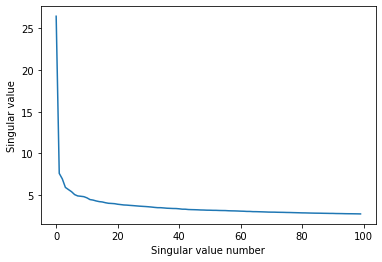

In [ ]:
# Create the plot. It should resemble the plot below.


plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

Let's take a look at what words are associated with each component. Let us use the 4th most significant component for this example (index 3). Remember that the larger the component's associated singular value, the more significant the component, and the words associated with each component can be found in the components_ of TruncatedSVD. Print the top 25 words in the 4th component. Finding the top words for each component can be achieved through sorting the component from greatest to least and identifying the ordering of the features in the sorted arrangement (hint, use argsort). 

In [ ]:
# Fill in the two lines below
component = 
V_T = 

print(V_T.shape)

# Find the associated words for the given component. After ranking them, print the top 25 words for the component. You should 
# get the words below in that order.




(10163, 100)
[ 4259  9668  4349 ...  6414  8950 10079]
he 0.5271371171926732
was 0.2823310898048911
his 0.19937336111221474
my 0.14426880793537095
him 0.12694647719281008
had 0.1207283895796685
me 0.1180333897856893
for 0.08810298377329359
thanks 0.08545317186553396
and 0.085212261054007
but 0.08486326450697201
year 0.0820267190635588
anyone 0.07306924604076914
game 0.06587444475231022
got 0.06036857105316556
didn 0.05955708283239263
out 0.059094934386944284
it 0.058979833905727135
team 0.05610841596112682
said 0.055973722140024953
would 0.05591243572748104
have 0.05559258737570682
up 0.055230498365858055
good 0.05494610771407437
on 0.05469880571297485


Now let take the 501st datapoint (index 500) from our testing dataset. We will set this as our "search" document. We will find the document in the training set that is related closest to this document, but first, let us take a look at the content of this document and its classification.

In [ ]:
# Display the document and its classification. The content below is the correct output.



MLB Standings and Scores for Wednesday, April 21st, 1993
	                   (including yesterday's games)

NATIONAL WEST	      Won  Lost   Pct.    GB   Last 10  Streak    Home   Road
San Francisco Giants   09   05    .643    --     8-2     Won 2   05-02  04-03
Houston Astros         07   06    .538   1.5     7-3    Lost 1   02-04  05-02
Atlanta Braves         08   07    .533   1.5     4-6     Won 1   04-03  04-04
Los Angeles Dodgers    06   08    .429   3.0     4-6    Lost 1   03-03  03-05
San Diego Padres       05   08    .385   3.5     4-6    Lost 1   03-04  02-04
Colorado Rockies       04   08    .333   4.0     4-6    Lost 2   03-03  01-05
Cincinnati Reds        04   09    .308   4.5     3-7     Won 2   02-04  02-05

NATIONAL EAST
Philadelphia Phillies  10   03    .769    --     7-3     Won 2   06-01  04-02
St. Louis Cardinals    08   05    .615   2.0     6-4     Won 1   05-02  03-03
Chicago Cubs           07   06    .538   3.0     6-4     Won 1   04-03  03-03
Montreal Expos       

We will now reduce then transform our search document into its component form to compare it with our reduced and transformed training set. You can reduce the datapoint to fit our training set by transforming with our previous SelectPercentile model. You will then need to transform the new document into a representation we can use to compare to the existing documents. Because our training documents have been transformed from containing features to containing components, we will need convert our search document to have the same representation. We can do this by performing a dot product on the TFIDF representation of our search document with our SVD components (be sure the dimensions match).

In [ ]:
# Reduce the document's features to match our LSI model, then transform the document from feature format to component format



To find the document in our training set most similar to our choosen document. We will need to run a [cosine similarity function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) between our transformed search document and the transformed training set. Once you have the cosine similarity values, order the training set documents from most to least similar to our search document.

In [ ]:
# Find the most similar documents to our selected document using cosine similarity. The numbers below should be your most 
# to least similar document ordering. 





[10853  7672  8090 ...  3611  4248  2284]
10853 0.9334949048012786
7672 0.7996704612313269
8090 0.7812350563971919
3335 0.6902479400364353
7984 0.6839433585506729


What are the contents of the top 3 most similar documents in the training set? What categories do they fall under? Does they look similar to our initial search document?

In [ ]:
# Display the content/data of the top 3 documents. 






10853
MLB Standings and Scores for Satruday, April 17th, 1993
	                   (including yesterday's games)

NATIONAL WEST	      Won  Lost   Pct.    GB   Last 10  Streak    Home   Road
San Francisco Giants   07   04    .636    --     6-4     Won 2   04-01  03-03
Houston Astros         06   04    .600   0.5     6-4     Won 1   01-03  05-01
Atlanta Braves         06   06    .500   1.5     5-5    Lost 3   04-03  03-02
Los Angeles Dodgers    04   07    .364   3.0     4-6     Won 1   01-03  03-04
Colorado Rockies       03   06    .333   3.0     3-6    Lost 1   03-03  00-03
San Diego Padres       03   07    .300   3.5     3-7     Won 1   01-04  02-03
Cincinnati Reds        02   08    .200   4.5     2-8    Lost 4   01-03  01-05

NATIONAL EAST
Philadelphia Phillies  08   02    .800    --     8-2    Lost 1   05-01  03-01
Pittsburgh Pirates     07   03    .700   1.0     7-3    Lost 1   03-02  04-01
St. Louis Cardinals    07   03    .700   1.0     7-3    Lost 1   04-02  03-01
New York Mets   